In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [ ]:
df = pd.read_csv("complaints.csv")
basic_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              3000 non-null   int64 
 1   complaint_text  3000 non-null   object
 2   category        3000 non-null   object
 3   urgency         3000 non-null   object
dtypes: int64(1), object(3)
memory usage: 93.9+ KB


In [ ]:
df.head()

,id,complaint_text,category,urgency
0,1,I'm having trouble registering for CHEM 102. T...,Academic,Medium
1,2,Just wanted to note that the lightbulb above t...,Facilities,Low
2,3,"There's been no hot water in Cedar Hall, wing ...",Housing,High
3,4,URGENT!! I am trying to take my midterm exam o...,IT Support,Critical
4,5,My financial aid package seems lower than expe...,Financial Aid,Medium


In [ ]:
df.tail()

,id,complaint_text,category,urgency
2995,2996,Cyberattack targeting university financial sys...,IT Support,Critical
2996,2997,Dining hall staff knowingly served food past i...,Dining Services,Critical
2997,2998,Advisor coerced student into changing major ag...,Academic,Critical
2998,2999,Complete failure of the fire alarm system in a...,Facilities,Critical
2999,3000,My roommate is stockpiling weapons in our dorm...,Housing,Critical


In [ ]:
missing_values = df.isnull().sum()
category_dist = df['category'].value_counts()
urgency_dist = df['urgency'].value_counts()

cross_dist = pd.crosstab(df['category'], df['urgency'])

df['word_count'] = df['complaint_text'].apply(lambda x: len(str(x).split()))
word_count_stats = df['word_count'].describe()

In [ ]:
missing_values

,0
id,0
complaint_text,0
category,0
urgency,0


In [ ]:
category_dist

,count
category,
IT Support,530
Academic,459
Facilities,444
Housing,442
Campus Life,437
Financial Aid,436
Dining Services,252


In [ ]:
urgency_dist

,count
urgency,
Medium,1117
Low,964
High,565
Critical,354


In [ ]:
cross_dist

urgency,Critical,High,Low,Medium
category,,,,
Academic,39,123,82,215
Campus Life,32,25,219,161
Dining Services,45,32,141,34
Facilities,50,68,157,169
Financial Aid,60,123,117,136
Housing,59,74,120,189
IT Support,69,120,128,213


In [ ]:
word_count_stats

,word_count
count,3000.000000
mean,14.252333
std,6.160193
min,5.000000
25%,10.000000
50%,12.000000
75%,16.000000
max,44.000000


In [ ]:
# Helper function for pie chart labels
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{pct:.1f}%\n({val})'
    return my_autopct

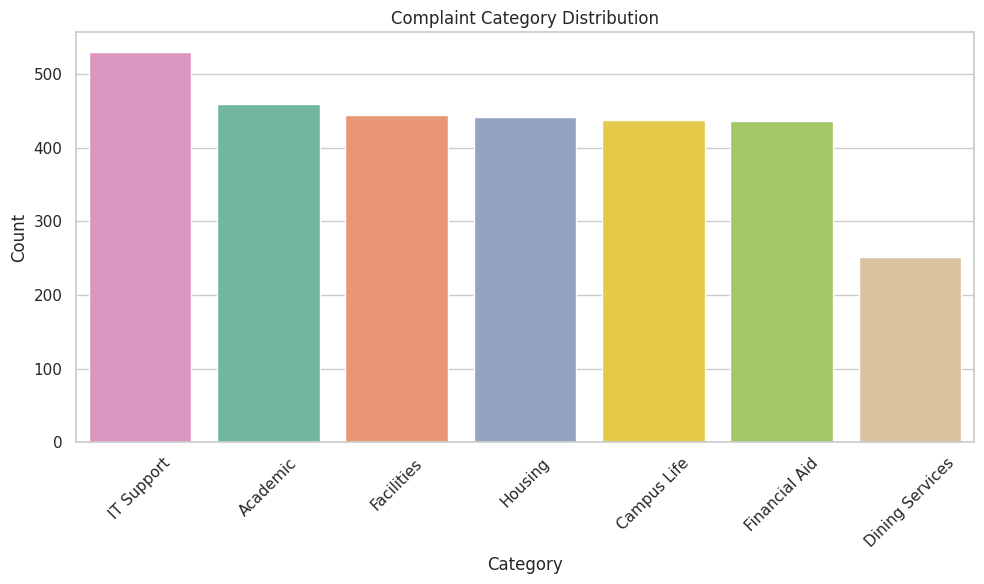

In [ ]:
# Plot 1: Category Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=df, order=df['category'].value_counts().index, hue='category', palette="Set2", legend=False)
plt.title('Complaint Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

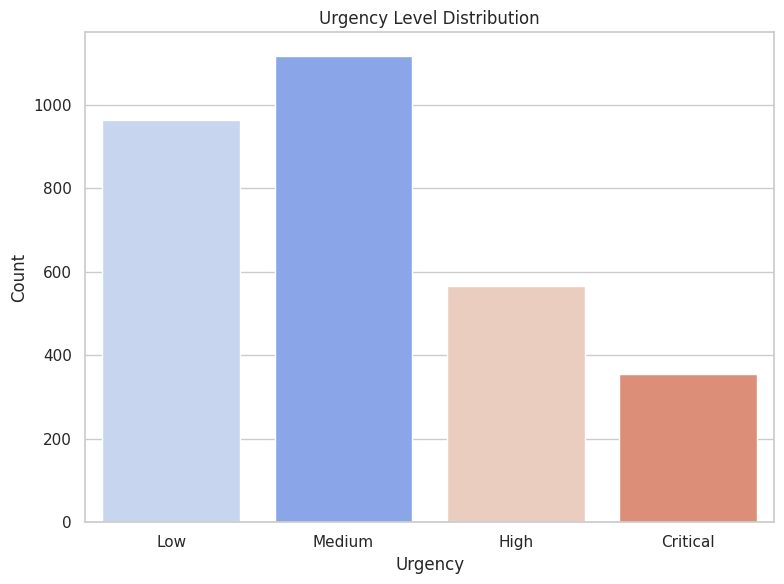

In [ ]:
# Plot 2: Urgency Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='urgency', data=df, order=['Low', 'Medium', 'High', 'Critical'], hue='urgency', palette="coolwarm", legend=False)
plt.title('Urgency Level Distribution')
plt.xlabel('Urgency')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

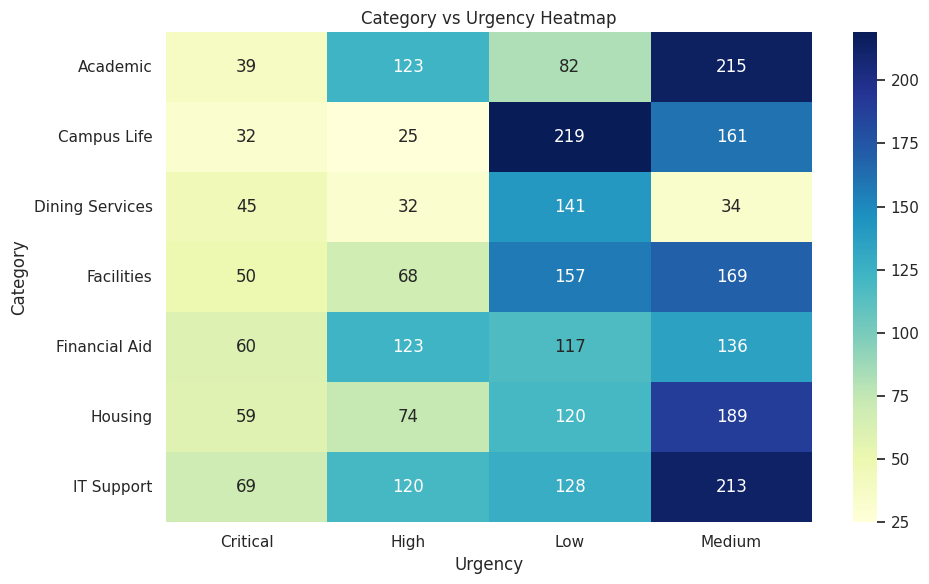

In [ ]:
# Plot 3: Category vs Urgency Heatmap
cross_tab = pd.crosstab(df['category'], df['urgency'])
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap="YlGnBu")
plt.title('Category vs Urgency Heatmap')
plt.xlabel('Urgency')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

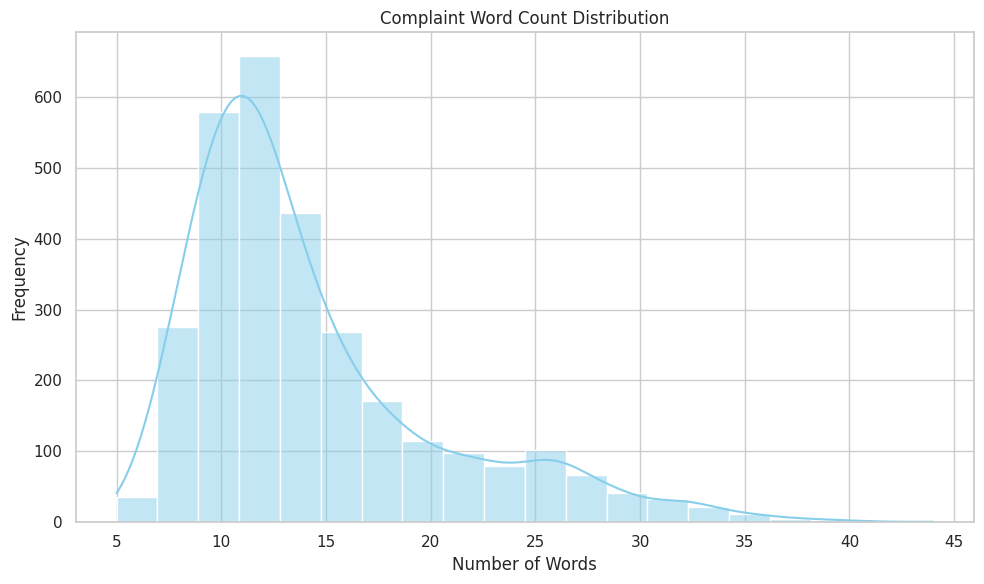

In [ ]:
# Plot 4: Word Count Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], bins=20, kde=True, color='skyblue')
plt.title('Complaint Word Count Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

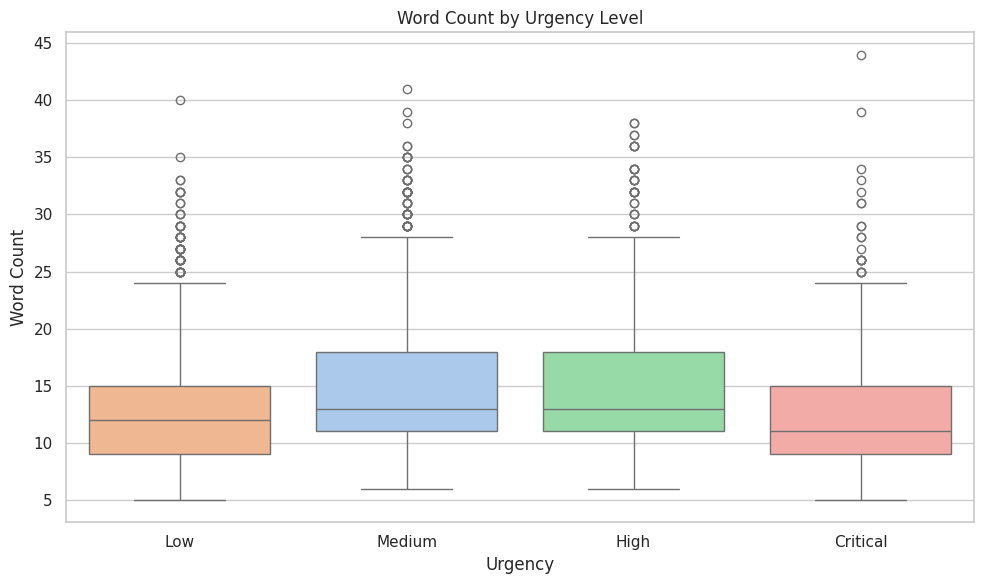

In [ ]:
# Plot 5: Boxplot of Word Count by Urgency
plt.figure(figsize=(10, 6))
sns.boxplot(x='urgency', y='word_count', data=df, order=['Low', 'Medium', 'High', 'Critical'], hue='urgency', palette="pastel", legend=False)
plt.title('Word Count by Urgency Level')
plt.xlabel('Urgency')
plt.ylabel('Word Count')
plt.tight_layout()
plt.show()

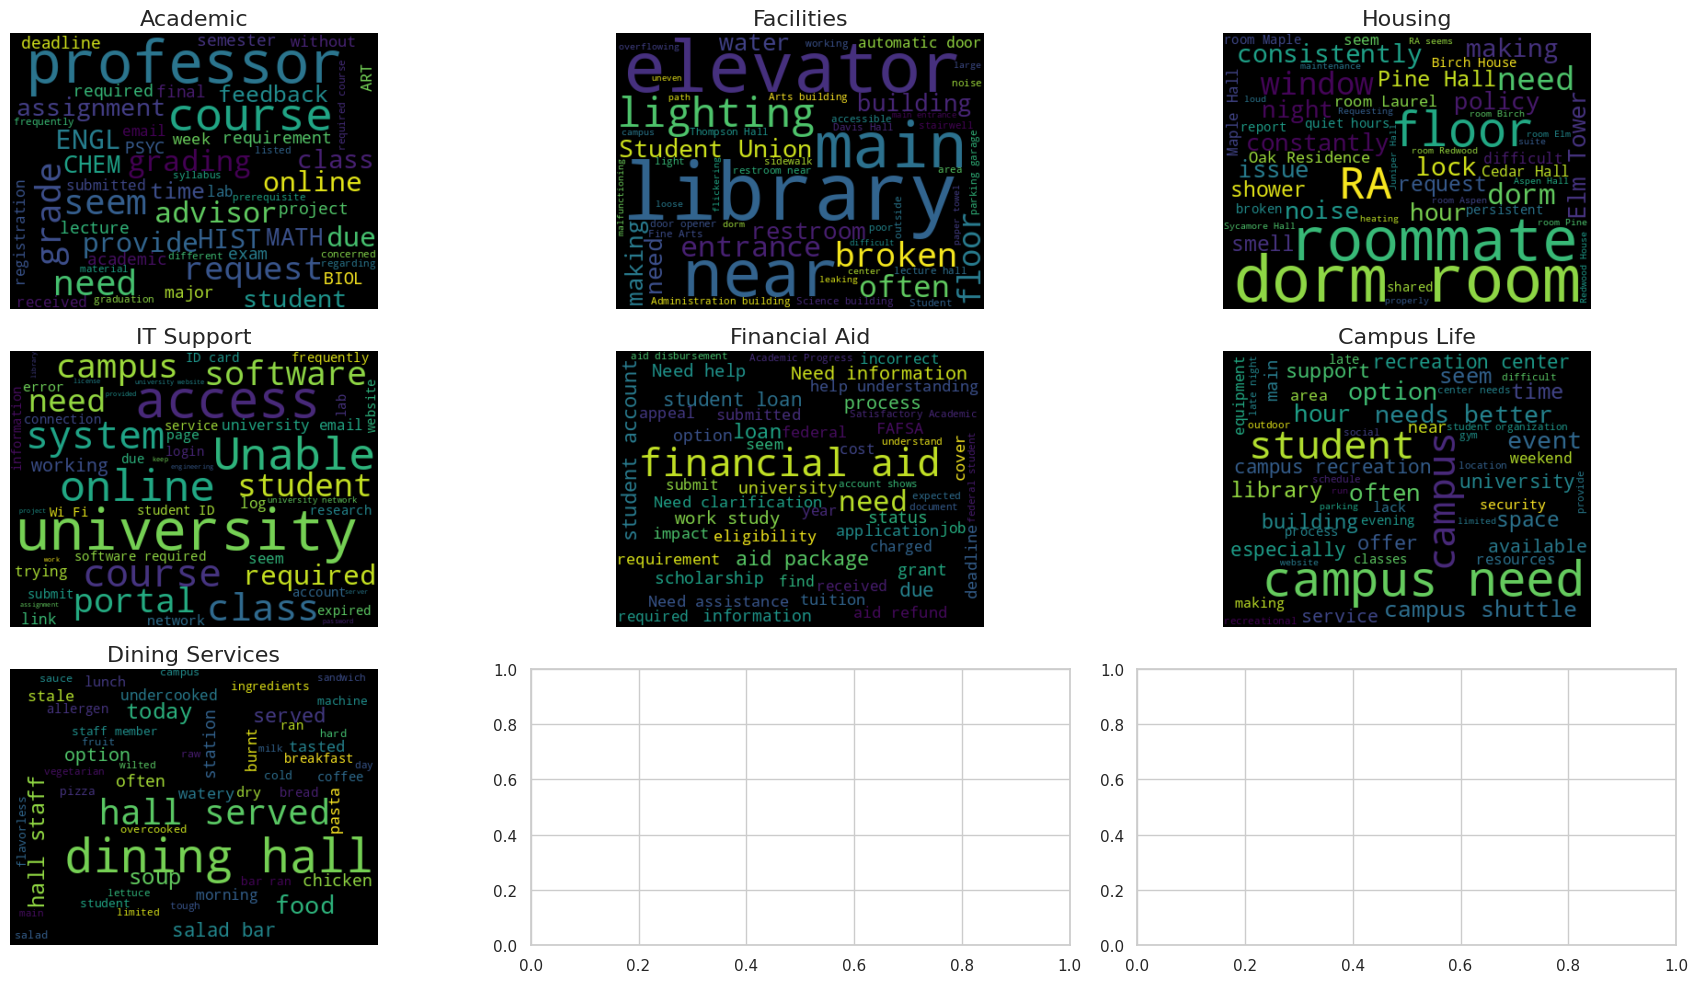

In [ ]:
categories = df['category'].unique()
fig, axes = plt.subplots(3, 3, figsize=(18, 10))

for i, category in enumerate(categories):
    ax = axes[i // 3, i % 3]
    text = " ".join(df[df['category'] == category]['complaint_text'].tolist())
    wc = WordCloud(width=400, height=300, stopwords=set(STOPWORDS), max_words=50)
    wc.generate(text)
    ax.imshow(wc, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(category, fontsize=16)

plt.tight_layout()
plt.show()